In [18]:
import numpy as np
import pandas as pd
import cv2
import tensorflow
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D



In [19]:
# data
data = pd.read_csv('train_data.csv', header=None)  # path of the .csv file
print(data.shape)  # to check the shape
#print(data.head(5))  # print the first 5 lines of the data

(10000, 3072)


In [20]:
data

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,149,155,159,142,147,148,137,143,141,135,...,77,89,100,80,88,97,73,79,90,67
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,12,15,12,8,9,7,8,10,8,6,...,1,1,1,1,1,1,0,2,2,1
3,159,142,146,150,138,144,128,121,128,115,...,132,147,130,131,147,130,131,146,129,130
4,109,173,217,103,166,209,105,168,211,111,...,100,153,121,98,152,120,97,151,119,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,54,53,56,103,97,95,120,112,106,98,...,94,115,104,101,118,110,107,117,113,108
9996,85,130,98,68,113,86,43,81,61,27,...,201,221,229,202,221,228,210,224,230,210
9997,200,200,200,200,200,200,199,199,199,200,...,159,176,169,159,177,170,160,176,168,158
9998,29,33,28,32,35,28,36,39,32,30,...,53,72,72,65,86,85,76,86,85,75


In [21]:
data=data.to_numpy()

In [22]:
data = data.reshape(10000, 32, 32, 3)

In [23]:
data.shape

(10000, 32, 32, 3)

In [24]:
data

array([[[[149, 155, 159],
         [142, 147, 148],
         [137, 143, 141],
         ...,
         [107, 121,  98],
         [106, 119,  99],
         [ 97, 111,  94]],

        [[153, 158, 159],
         [153, 157, 158],
         [155, 159, 160],
         ...,
         [108, 123, 105],
         [104, 117, 101],
         [ 93, 107,  90]],

        [[152, 154, 152],
         [159, 160, 162],
         [164, 167, 171],
         ...,
         [113, 126, 112],
         [108, 120, 106],
         [100, 112,  97]],

        ...,

        [[ 80,  86,  75],
         [124, 127, 119],
         [149, 152, 149],
         ...,
         [ 90, 105,  93],
         [ 83,  97,  81],
         [ 74,  88,  69]],

        [[ 69,  75,  69],
         [119, 125, 129],
         [147, 153, 158],
         ...,
         [ 87, 100,  84],
         [ 82,  96,  73],
         [ 75,  88,  64]],

        [[ 58,  65,  56],
         [103, 111, 114],
         [127, 135, 131],
         ...,
         [ 89, 100,  80],
        

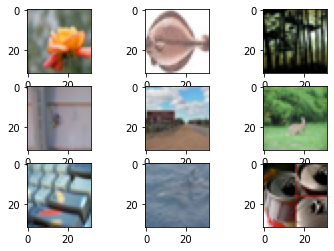

In [25]:
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(data[i])
pyplot.show()

In [26]:
label = pd.read_csv('train_label.csv')

In [27]:
label

,id,label
0,0,70
1,1,32
2,2,33
3,3,79
4,4,60
...,...,...
9995,9995,31
9996,9996,13
9997,9997,79
9998,9998,3


In [28]:
y = label['label']
X = data / 255.0

In [29]:
y

0       70
1       32
2       33
3       79
4       60
        ..
9995    31
9996    13
9997    79
9998     3
9999    69
Name: label, Length: 10000, dtype: int64

In [32]:
IMAGE_SIZE = [32,32]
efnb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + [3], classes=100)
#inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


16711680/16705208 [==============================] - 2s 0us/step


In [34]:
# Create the model
from tensorflow.keras.losses import sparse_categorical_crossentropy
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
input_shape = (img_width, img_height, img_num_channels)
validation_split = 0.2
verbosity = 1
model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='softmax'))

model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])


In [35]:
# Fit the model
model.fit(X, y, epochs=no_epochs, batch_size=32)


Epoch 1/100
313/313 [==============================] - 31s 55ms/step - loss: 4.5973 - accuracy: 0.0488
Epoch 2/100
313/313 [==============================] - 16s 52ms/step - loss: 3.8855 - accuracy: 0.1137
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 3.4590 - accuracy: 0.1786
Epoch 4/100
313/313 [==============================] - 17s 54ms/step - loss: 3.1642 - accuracy: 0.2304
Epoch 5/100
313/313 [==============================] - 16s 52ms/step - loss: 2.9191 - accuracy: 0.2706
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 2.7131 - accuracy: 0.3074
Epoch 7/100
313/313 [==============================] - 16s 52ms/step - loss: 2.5092 - accuracy: 0.3551
Epoch 8/100
313/313 [==============================] - 16s 52ms/step - loss: 2.3479 - accuracy: 0.3813
Epoch 9/100
313/313 [==============================] - 16s 52ms/step - loss: 2.2287 - accuracy: 0.4134
Epoch 10/100
313/313 [==============================] - 17s 53ms/step - l

313/313 [==============================] - 16s 52ms/step - loss: 0.4716 - accuracy: 0.8657
Epoch 80/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5897 - accuracy: 0.8365
Epoch 81/100
313/313 [==============================] - 16s 52ms/step - loss: 1.1779 - accuracy: 0.6839
Epoch 82/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5157 - accuracy: 0.8520
Epoch 83/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5578 - accuracy: 0.8445
Epoch 84/100
313/313 [==============================] - 16s 52ms/step - loss: 0.8799 - accuracy: 0.7568
Epoch 85/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5984 - accuracy: 0.8248
Epoch 86/100
313/313 [==============================] - 16s 52ms/step - loss: 0.7515 - accuracy: 0.7842
Epoch 87/100
313/313 [==============================] - 16s 52ms/step - loss: 0.8241 - accuracy: 0.7706
Epoch 88/100
313/313 [==============================] - 16s 52ms/step - loss:

In [36]:
test_data = pd.read_csv('test_data.csv', header=None)  # path of the .csv file
print(test_data.shape)

(2000, 3072)


In [37]:
test_data=test_data.to_numpy()
test_data = test_data.reshape(2000, 32, 32, 3)

In [38]:
test_data

array([[[[201, 190, 166],
         [204, 194, 169],
         [194, 184, 160],
         ...,
         [ 78,  73,  67],
         [ 68,  63,  57],
         [ 58,  53,  48]],

        [[185, 176, 155],
         [176, 167, 148],
         [162, 153, 136],
         ...,
         [ 89,  80,  68],
         [ 80,  71,  58],
         [ 73,  65,  52]],

        [[162, 153, 136],
         [150, 141, 125],
         [148, 138, 120],
         ...,
         [ 86,  77,  63],
         [ 86,  76,  62],
         [ 86,  75,  61]],

        ...,

        [[144, 129, 102],
         [102,  91,  77],
         [ 62,  56,  51],
         ...,
         [104,  92,  70],
         [106,  92,  70],
         [100,  88,  68]],

        [[163, 145, 108],
         [159, 141, 105],
         [142, 126,  95],
         ...,
         [118, 104,  81],
         [121, 105,  83],
         [126, 111,  90]],

        [[155, 139, 106],
         [148, 133, 100],
         [139, 123,  94],
         ...,
         [102,  88,  69],
        

In [39]:
prediction=model.predict(test_data)

In [40]:
prediction.shape

(2000, 100)

In [41]:
pred=np.argmax(prediction, axis=1)

In [42]:
pred.shape

(2000,)

In [43]:
pred

array([ 9, 65, 65, ..., 65, 65, 65], dtype=int64)

In [44]:
data_frame = pd.DataFrame(pred, columns=['label'])


# converting data frame to csv
data_frame.to_csv("transfer.csv", index_label='id')
